In [3]:
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [4]:
def read_rsem_files(directory_path, nr_of_patients):
    rsem_data = {}
    for file in os.listdir(directory_path):
        if file.endswith('.genes.results'):
            patient_id, _ , _ = file.split('_')
            rsem_data[patient_id] = pd.read_csv(os.path.join(directory_path, file), sep = '\t')
    return rsem_data

In [5]:
directory_path = '/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/results/03_rsem/raw/DNMT3A'
rsem_data = read_rsem_files(directory_path, 9)

In [6]:
for patient in rsem_data:
    df = rsem_data[patient]
    df = df[df['gene_id'].str.startswith('Mmus38')]
    rsem_data[patient] = df  # Update the DataFrame in the dictionary

In [7]:
def count_breadth(expression_df):
    breadth = len(expression_df[expression_df['TPM'] > 1] )    
    return breadth

def count_abundance(expression_df):
    abundance = expression_df['TPM'].sum()
    return abundance

In [8]:
Dnmt3a_form = {
    'GSM2309133' : '+/-',
    'GSM2309134' : '+/-',
    'GSM2309135' : '+/+',
    'GSM2309136' : '+/+',
    'GSM2309137' : '+/m',
    'GSM2309138' : '+/+',
    'GSM2309139' : '+/m',
    'GSM2309140' : '+/m',
    'GSM2309141' : '+/m'

}
patient2genotype = {
    '1' : '+/-',
    '2' : '+/-',
    '3' : '+/+',
    '4' : '+/+',
    '5' : '+/m',
    '6' : '+/+',
    '7' : '+/m',
    '8' : '+/m',
    '9' : '+/m' 

}

In [9]:
ERV_exp_metrics = {}

for patient, df in rsem_data.items():
    breadth = count_breadth(df)
    abundance = count_abundance(df)
    print('{} : breadth : {} abundance {} genotype {}'.format(patient, breadth, abundance, patient2genotype[patient]))
    ERV_exp_metrics[patient] = [breadth, abundance]

8 : breadth : 482 abundance 4530.64 genotype +/m
9 : breadth : 404 abundance 3971.67 genotype +/m
4 : breadth : 327 abundance 3425.7699999999995 genotype +/+
1 : breadth : 564 abundance 3887.7500000000005 genotype +/-
7 : breadth : 417 abundance 3938.7700000000004 genotype +/m
5 : breadth : 317 abundance 3032.81 genotype +/m
2 : breadth : 439 abundance 4185.12 genotype +/-
3 : breadth : 700 abundance 5382.860000000001 genotype +/+
6 : breadth : 468 abundance 4148.599999999999 genotype +/+


TEtranscript part

In [10]:
def get_TEtranscript_path(directory_path, subfolder):
    subfolder_path = os.path.join(directory_path, subfolder)
    files = os.listdir(subfolder_path)
    if len(files) != 1:
        return 0
    return os.path.join(subfolder_path, files[0])
    
def modify_columns(columns, patient_id):
    modified_columns = [col + '_' + patient_id for col in columns]
    return modified_columns

def consolidate_gene_id_columns(df):
    gene_id_columns = [col for col in df.columns if col.startswith('gene_id_')]
    if gene_id_columns:
        df['gene_id'] = df[gene_id_columns[0]]
        df.drop(gene_id_columns, axis=1, inplace=True)
    return df

    
def load_TEtranscript_data(directory_path):
    columns = ['gene_id', 'count']
    TEtranscript_data = {}
    for subfolder in os.listdir(directory_path):
        patient_id, _ = subfolder.split('_')
        TE_file_path = get_TEtranscript_path(directory_path, subfolder)
        if TE_file_path == 0:
            print('couldn \'t load the TEfile')
            return 0
        TEtranscript_data[patient_id] = pd.read_csv(TE_file_path, sep='\t', header=0, names=modify_columns(columns, patient_id))
    return TEtranscript_data

In [11]:
directory_path = '/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/results/03_TEcount/DNMT3A/'

TEtranscript_data = load_TEtranscript_data(directory_path)


In [12]:
#CONCATENATE INTO ONE BIG DATAFRAME
def concatenate_patient_dataframes(TEtranscript_data):
    patient_dfs = list(TEtranscript_data.values())
    concatenated_df = pd.concat(patient_dfs, axis=1) if patient_dfs else None
    concatenated_df = consolidate_gene_id_columns(concatenated_df)
    return concatenated_df

In [13]:
DNMT3A_TE_df = concatenate_patient_dataframes(TEtranscript_data)
print(DNMT3A_TE_df)

        count_7  count_8  count_1  count_3  count_4  count_5  count_9  \
0         16849    14945    13068    14403    15478    14412    14066   
1             0        0        0        0        0        0        0   
2          3670     3708     2800     3125     4497     3514     3616   
3            11       24       47       18        5       14       28   
4           700      738      766      776      558      598      625   
...         ...      ...      ...      ...      ...      ...      ...   
117812      406      563      429      871      322      257      493   
117813      502      701      483      731      404      307      552   
117814      356      412      322      518      247      212      392   
117815      318      399      275      564      256      254      415   
117816        0        9        6       12        0        2        3   

        count_6  count_2                    gene_id  
0         14734    17870         ENSMUSG00000000001  
1             0

In [14]:
#FILTER OUT NON-ERV DATA
DNMT3A_TE_df = DNMT3A_TE_df[DNMT3A_TE_df['gene_id'].str.startswith('Mmus38')]
print(DNMT3A_TE_df.head())

       count_7  count_8  count_1  count_3  count_4  count_5  count_9  count_6  \
55487        0        0        0        0        0        0        0        0   
55488        0        0        0        0        0        0        0        0   
55489        0        0        0        0        0        0        0        0   
55490        0        0        0        0        0        0        0        0   
55491        0        0        0        0        0        0        0        0   

       count_2                             gene_id  
55487        0  Mmus38.MG3835p.11253181.11253444.-  
55488        0  Mmus38.MG3835p.11282143.11282406.-  
55489        0  Mmus38.MG3835p.11292306.11292806.-  
55490        0  Mmus38.MG3835p.11299849.11300547.-  
55491        0  Mmus38.MG3835p.11339347.11340210.-  


In [16]:
def filter_non_expressed_ERV(df):
    count_columns = [col for col in df.columns if col.startswith('count')]
    
    # Sum values along the rows for selected columns
    df.loc[:, 'sum_counts'] = df[count_columns].astype(int).sum(axis=1)
    
    # Filter rows where sum_counts is greater than 0
    df = df.loc[df['sum_counts'] > 0]
    
    # Drop the temporary 'sum_counts' column
    del df['sum_counts']
    
    return df

In [23]:
DNMT3A_TE_df_filtered = filter_non_expressed_ERV(DNMT3A_TE_df)
print(DNMT3A_TE_df_filtered.shape)
print(DNMT3A_TE_df_filtered)

(21437, 10)
        count_7  count_8  count_1  count_3  count_4  count_5  count_9  \
55688      2359     1471    16682     1401     1448     3029      905   
55689         2        5        5        2        1        6        1   
55690         0        2        8        0        1        0        0   
55692         0        1        0        1        0        0        0   
55693         0        0        0        0        0        1        0   
...         ...      ...      ...      ...      ...      ...      ...   
116588       11        0        6        0        6       10        0   
116601        7        0        0        0        4        4        0   
116606        1        0        0        0        2        0        0   
116657        0        0        0        1        0        0        1   
116660        0        0        0        1        0        1        1   

        count_6  count_2                            gene_id  
55688      3260     1665  Mmus38.chr1.100180308.1

In [24]:
def reshape_dataframe(df):
    id_vars = ['gene_id']
    value_vars = [col for col in df.columns if col.startswith('count_')]
    # Melt the DataFrame
    melted_df = pd.melt(df, id_vars=id_vars, value_vars=value_vars, var_name='patient_id', value_name='count')
    # Extract patient_id from column names
    melted_df['patient_id'] = melted_df['patient_id'].str.split('_', expand=True)[1].astype(int)
    
    return melted_df

In [25]:
reshaped = reshape_dataframe(DNMT3A_TE_df_filtered)


In [26]:

def visualise_ERV_expression(df, plot_type, threshold = False):
    plt.figure(figsize=(30, 30)) 
    if plot_type == 'scatter':
        sns.scatterplot(data=df, x='gene_id', y='count', hue='patient_id', palette = 'tab10') #s=4
    if plot_type == 'line':
        sns.lineplot(data=df, x='gene_id', y='count', hue='patient_id', palette = 'tab10')
    plt.xlabel('ERV id')
    plt.ylabel('count')

    plt.title('ERV expression levels measured with TECounts')
    # Adding legend
    plt.legend(title='Mouse ID', loc='upper right')
    if threshold == True:
        plt.xticks(rotation=90)
        
    plt.savefig('TEcounts_DNMT.jpg')
    plt.show()  

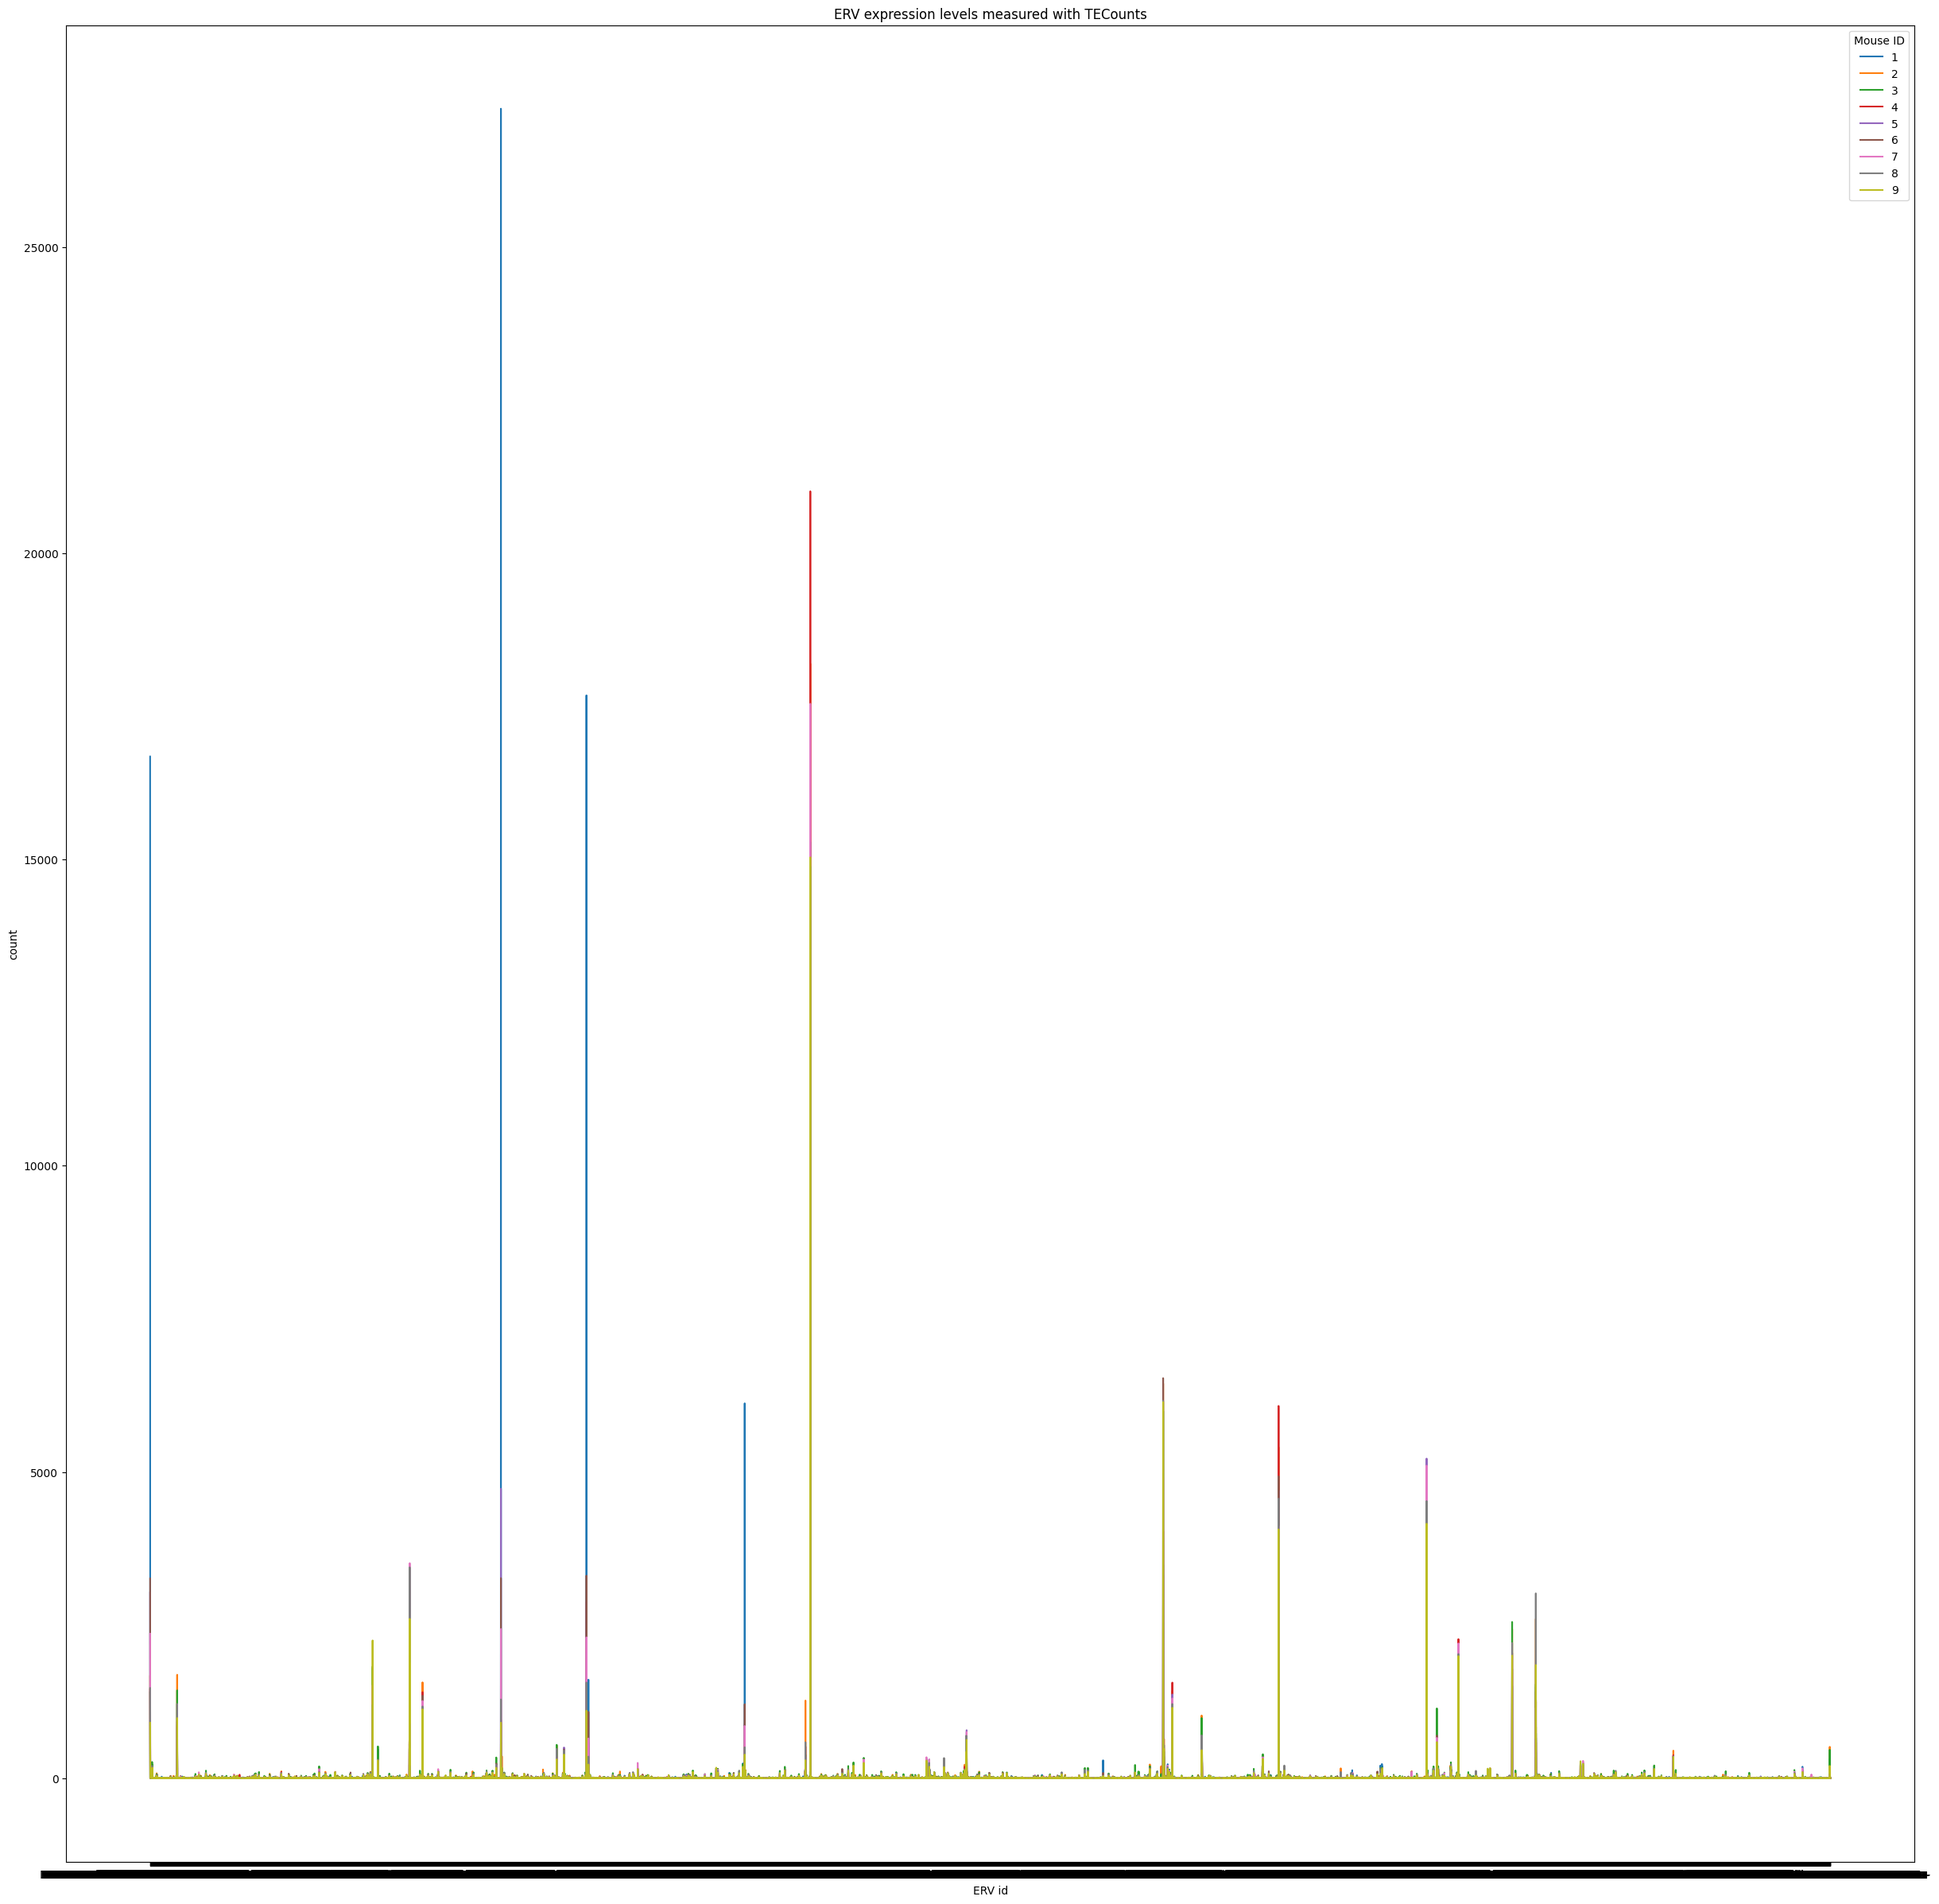

In [27]:
# plot_type 'line; or 'scatter'
visualise_ERV_expression(reshaped, 'line')

In [28]:
def visualise_ERV_expression_gropus(df, plot_type, patient2genotype, threshold = False):
    plt.figure(figsize=(30, 30)) 

    palette = {int(patient): genotype[1] for patient, genotype in patient2genotype.items()}

    if plot_type == 'scatter':
        sns.scatterplot(data=df, x='gene_id', y='count', hue='patient_id', palette = palette) #s=4
    if plot_type == 'line':
        sns.lineplot(data=df, x='gene_id', y='count', hue='patient_id', palette = palette)
    
    plt.xlabel('ERV id')
    plt.ylabel('count')

    plt.title('ERV expression levels measured with TEtranscripts')

    # Adding legend
    plt.legend(title='Mouse ID', loc='upper right')

    if threshold == True:
        plt.xticks(rotation=90)
    plt.savefig('TEcounts_DNMT_groupped.jpg')
    plt.show()    

In [29]:
patient2genotype = {
    '1' : ['+/-', 'red'],
    '2' : ['+/-', 'red'], 
    '3' : ['+/+',  'blue'],
    '4' : ['+/+',  'blue'],
    '5' : ['+/m', 'green'],
    '6' : ['+/+',  'blue'],
    '7' : ['+/m', 'green'],
    '8' : ['+/m', 'green'],
    '9' : ['+/m', 'green'],

}

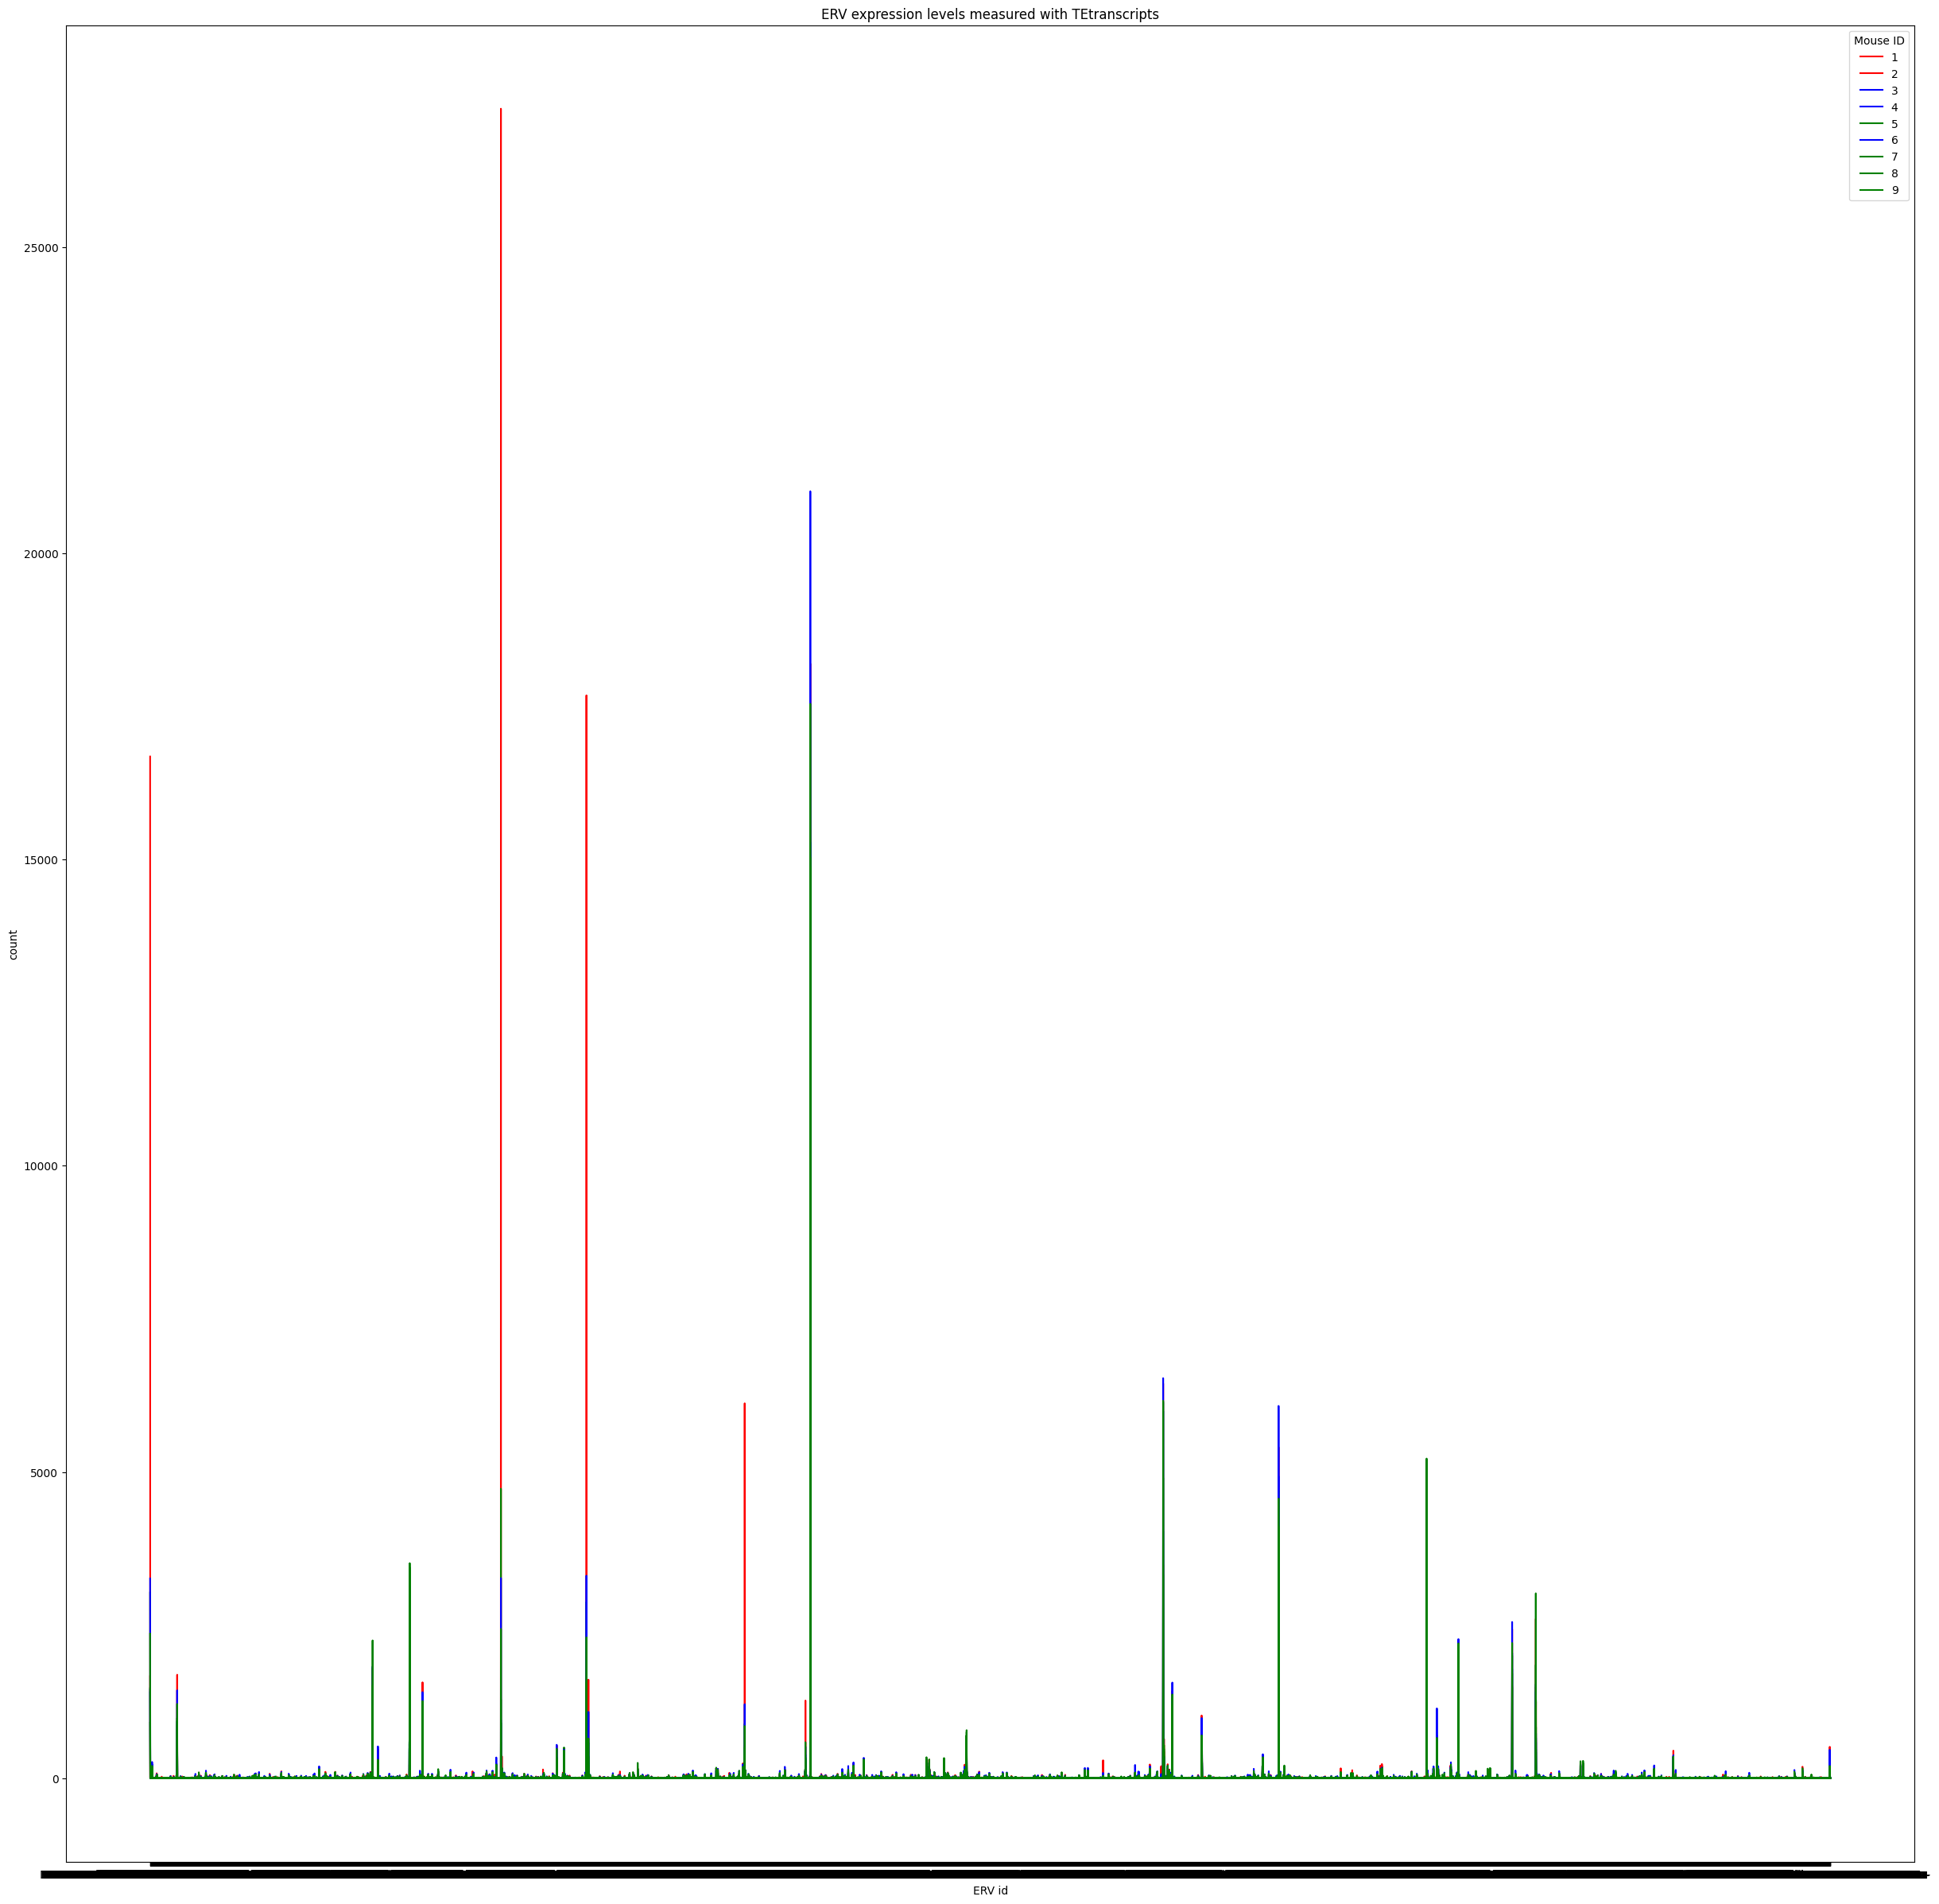

In [30]:
visualise_ERV_expression_gropus(reshaped, 'line' ,patient2genotype, threshold = False)

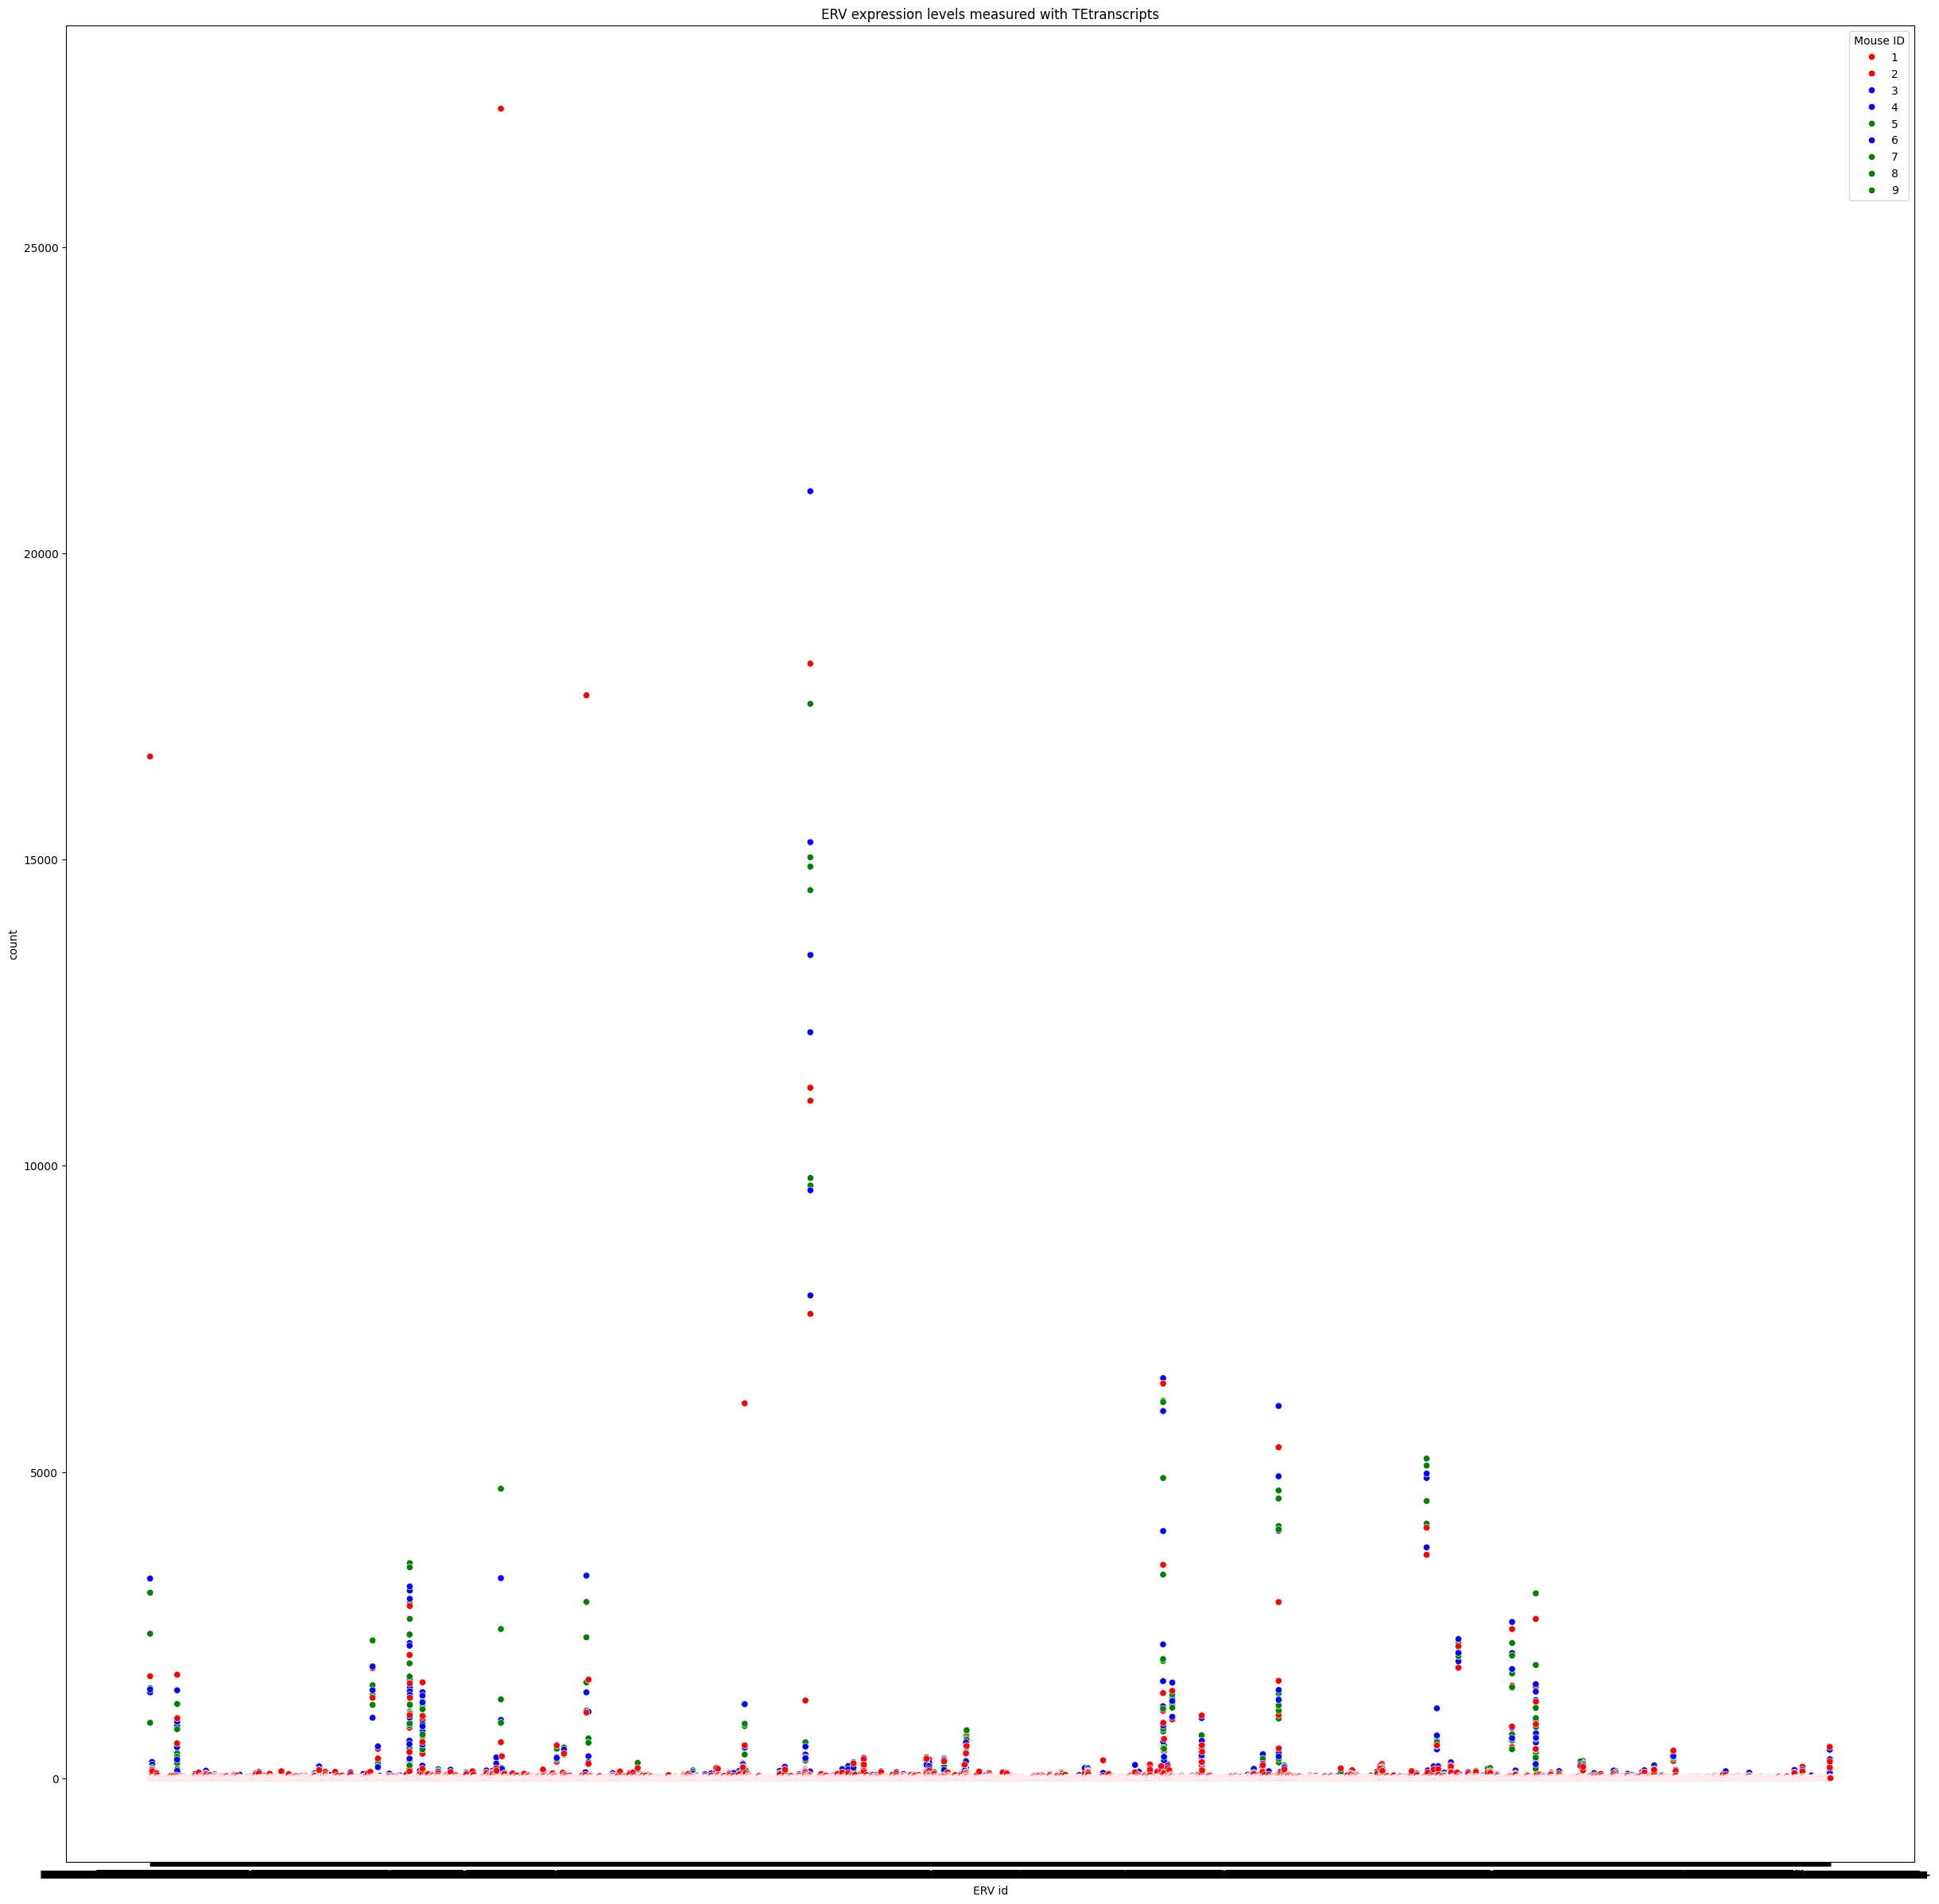

In [31]:
visualise_ERV_expression_gropus(reshaped, 'scatter' ,patient2genotype, threshold = False)